In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import os
import numpy as np
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.layers import Masking

Using TensorFlow backend.
C:\Users\silva\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\silva\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\silva\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\silva\AppData\Roa

In [2]:
def scale(training_set):
    # Feature Scaling
    sc = MinMaxScaler(feature_range = (0, 1))
    training_set_scaled = sc.fit_transform(training_set)
    # Creating a data structure with 10 time-steps and 1 output
    X_train = []
    y_train = []
    for i in range(10, training_set.shape[0]):
        X_train.append(training_set_scaled[i-10:i, 0])
        y_train.append(training_set_scaled[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    return X_train, y_train, sc

In [3]:
def train_LSTM(X_train, y_train):
    model = Sequential()
    model.add(Masking(mask_value=-1, input_shape = (X_train.shape[1], 1)))
    #Adding the first LSTM layer and some Dropout regularisation
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    # Adding a second LSTM layer and some Dropout regularisation
    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))
    # Adding a third LSTM layer and some Dropout regularisation
    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))
    # Adding a fourth LSTM layer and some Dropout regularisation
    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))
    # Adding the output layer
    model.add(Dense(units = 1))

    # Compiling the RNN
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')

    # Fitting the RNN to the Training set
    model.fit(X_train, y_train, epochs = 100, batch_size = 32)
    return model

In [4]:
def predict(dataset_train, dataset_test, model, sc):
    dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
    inputs = dataset_total[len(dataset_total) - dataset_test.shape[0] - 10:].values
    inputs = inputs.reshape(-1,1)
    inputs = sc.transform(inputs)
    X_test = []
    for i in range(10, inputs.shape[0]):
        X_test.append(inputs[i-10:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    print(X_test.shape)
    # (273, 10, 1)
    predicted_stock_price = model.predict(X_test)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)
    return X_test, predicted_stock_price

In [5]:
def plot_results(dataset_test, predicted_stock_price):
    # Visualising the results
    plt.plot(dataset_test.values, color = 'red', label = 'Real')
    plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted')
    plt.xticks(np.arange(0,dataset_test.shape[0],50))
    plt.xlabel('Time')
    plt.ylabel('Index')
    plt.legend()
    plt.show()

In [6]:
def impute_with_prediction(df_orig, df_imputed):
    for i in df_orig.index:
        if pd.isna(df_orig.loc[i]):
            df_orig.at[i] = df_imputed.loc[i]
    return df_orig

In [7]:
INPUT = 'output/\CompleteWeeklyIndexes'
df = pd.read_csv(INPUT+'.csv', parse_dates=True, index_col=0)

Epoch 1/100
772/772 [==============================] - 5s 7ms/step - loss: 0.1303
Epoch 2/100
772/772 [==============================] - 1s 1ms/step - loss: 0.0274
Epoch 3/100
772/772 [==============================] - 1s 1ms/step - loss: 0.0214
Epoch 4/100
772/772 [==============================] - 1s 1ms/step - loss: 0.0212
Epoch 5/100
772/772 [==============================] - 1s 1ms/step - loss: 0.0199
Epoch 6/100
772/772 [==============================] - 1s 1ms/step - loss: 0.0200
Epoch 7/100
772/772 [==============================] - 1s 1ms/step - loss: 0.0186
Epoch 8/100
772/772 [==============================] - 1s 1ms/step - loss: 0.0198
Epoch 9/100
772/772 [==============================] - 1s 1ms/step - loss: 0.0196
Epoch 10/100
772/772 [==============================] - 1s 1ms/step - loss: 0.0189
Epoch 11/100
772/772 [==============================] - 1s 1ms/step - loss: 0.0189
Epoch 12/100
772/772 [==============================] - 1s 1ms/step - loss: 0.0191
Epoch 13/100


772/772 [==============================] - 1s 1ms/step - loss: 0.0152
Epoch 100/100
772/772 [==============================] - 1s 1ms/step - loss: 0.0162


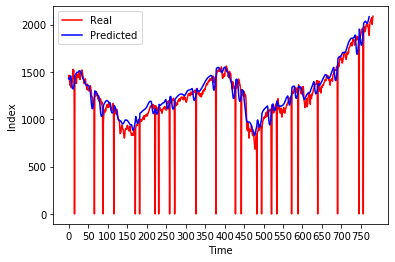

(272, 10, 1)


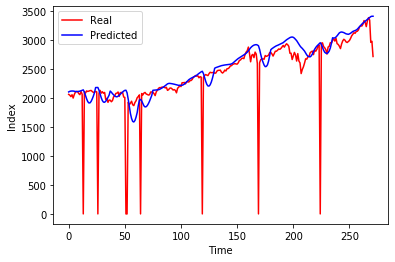

Epoch 1/100
772/772 [==============================] - 33s 42ms/step - loss: 0.0316
Epoch 2/100
772/772 [==============================] - 1s 2ms/step - loss: 0.0132
Epoch 3/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0113
Epoch 4/100
772/772 [==============================] - 1s 2ms/step - loss: 0.0104
Epoch 5/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0102
Epoch 6/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0105
Epoch 7/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0101
Epoch 8/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0097
Epoch 9/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0106
Epoch 10/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0107
Epoch 11/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0097
Epoch 12/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0094
Epoch 13/10

772/772 [==============================] - 1s 1ms/step - loss: 0.0085
Epoch 100/100
772/772 [==============================] - 1s 1ms/step - loss: 0.0087


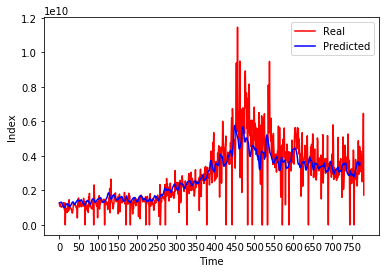

(272, 10, 1)


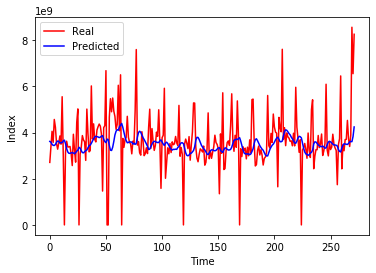

Epoch 1/100
772/772 [==============================] - 37s 48ms/step - loss: 0.0274
Epoch 2/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0117
Epoch 3/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0097
Epoch 4/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0090
Epoch 5/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0089
Epoch 6/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0088
Epoch 7/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0086
Epoch 8/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0087
Epoch 9/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0082A:
Epoch 10/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0089
Epoch 11/100
772/772 [==============================] - 1s 2ms/step - loss: 0.0083
Epoch 12/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0080
Epoch 13/

772/772 [==============================] - 1s 1ms/step - loss: 0.0050
Epoch 100/100
772/772 [==============================] - 1s 1ms/step - loss: 0.0047


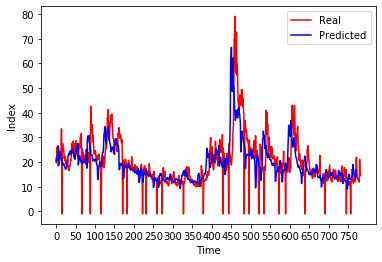

(272, 10, 1)


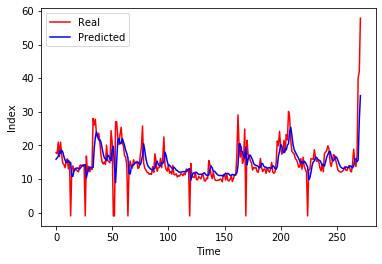

Epoch 1/100
772/772 [==============================] - 37s 48ms/step - loss: 0.3243
Epoch 2/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0524
Epoch 3/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0480
Epoch 4/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0429
Epoch 5/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0420
Epoch 6/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0429
Epoch 7/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0430
Epoch 8/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0406
Epoch 9/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0429
Epoch 10/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0409
Epoch 11/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0375
Epoch 12/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0396
Epoch 13/10

772/772 [==============================] - 1s 1ms/step - loss: 0.0355
Epoch 100/100
772/772 [==============================] - 1s 1ms/step - loss: 0.0350


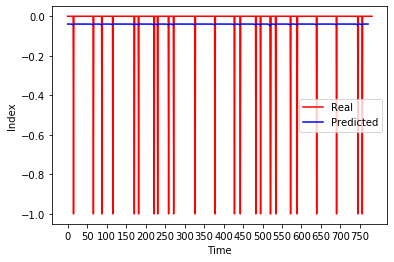

(272, 10, 1)


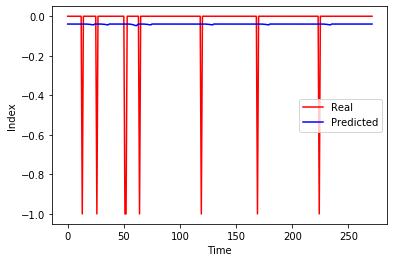

Epoch 1/100
772/772 [==============================] - 41s 53ms/step - loss: 0.1317
Epoch 2/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0295
Epoch 3/100
772/772 [==============================] - ETA: 0s - loss: 0.022 - 2s 2ms/step - loss: 0.0232
Epoch 4/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0234
Epoch 5/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0209
Epoch 6/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0201A: 0s
Epoch 7/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0210
Epoch 8/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0202
Epoch 9/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0194
Epoch 10/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0198
Epoch 11/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0197
Epoch 12/100
772/772 [==============================] - 2s 2ms/st

772/772 [==============================] - 1s 1ms/step - loss: 0.0160
Epoch 99/100
772/772 [==============================] - 1s 1ms/step - loss: 0.0155
Epoch 100/100
772/772 [==============================] - 1s 2ms/step - loss: 0.0163


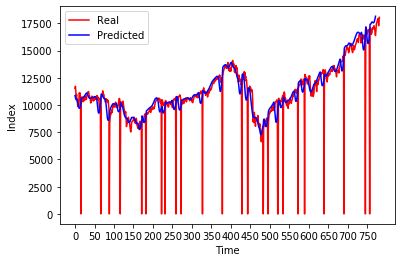

(272, 10, 1)


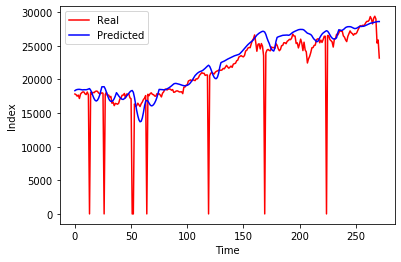

Epoch 1/100
772/772 [==============================] - 46s 60ms/step - loss: 0.0408
Epoch 2/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0221
Epoch 3/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0211
Epoch 4/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0205
Epoch 5/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0201
Epoch 6/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0209
Epoch 7/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0208
Epoch 8/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0200
Epoch 9/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0202
Epoch 10/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0208
Epoch 11/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0212
Epoch 12/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0198
Epoch 13/10

772/772 [==============================] - 2s 2ms/step - loss: 0.0191
Epoch 100/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0189


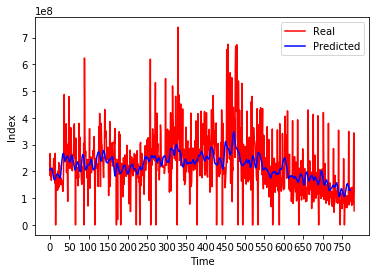

(272, 10, 1)


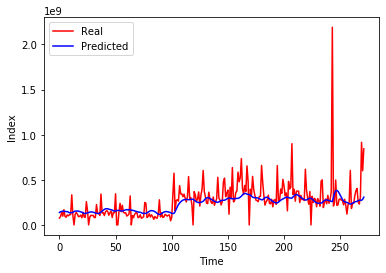

Epoch 1/100
772/772 [==============================] - 36s 47ms/step - loss: 0.0744
Epoch 2/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0198
Epoch 3/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0126A: 0s
Epoch 4/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0117
Epoch 5/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0123
Epoch 6/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0127
Epoch 7/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0123
Epoch 8/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0117
Epoch 9/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0124
Epoch 10/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0121
Epoch 11/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0112
Epoch 12/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0114
Epoch 

772/772 [==============================] - 1s 1ms/step - loss: 0.0097
Epoch 100/100
772/772 [==============================] - 1s 1ms/step - loss: 0.0092


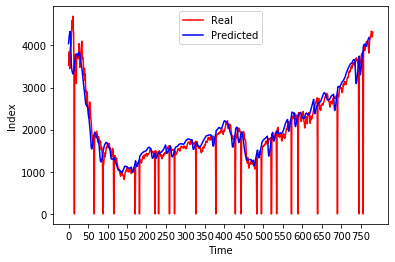

(272, 10, 1)


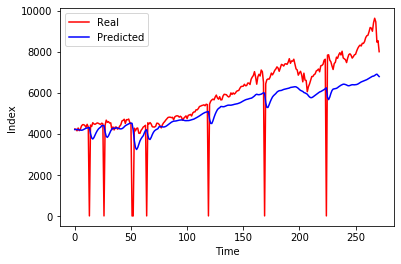

Epoch 1/100
772/772 [==============================] - 34s 44ms/step - loss: 0.0700
Epoch 2/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0246
Epoch 3/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0215A: 0s - loss: 0
Epoch 4/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0216
Epoch 5/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0208
Epoch 6/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0221
Epoch 7/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0213A: 0s 
Epoch 8/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0236A: 0s -
Epoch 9/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0209
Epoch 10/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0206
Epoch 11/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0209
Epoch 12/100
772/772 [==============================] - 2s 2ms/ste

772/772 [==============================] - 2s 2ms/step - loss: 0.0200
Epoch 99/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0200
Epoch 100/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0208


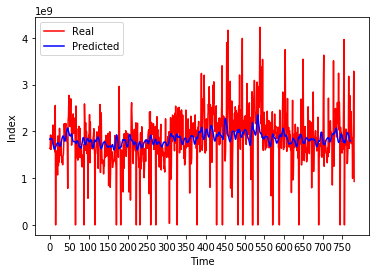

(272, 10, 1)


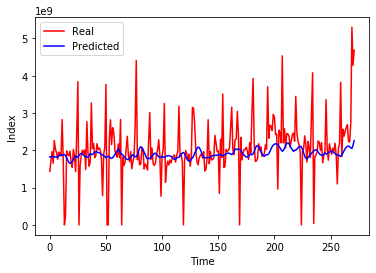

Epoch 1/100
772/772 [==============================] - 35s 46ms/step - loss: 0.1196
Epoch 2/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0291
Epoch 3/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0266
Epoch 4/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0260
Epoch 5/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0272
Epoch 6/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0289
Epoch 7/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0252
Epoch 8/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0246
Epoch 9/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0228
Epoch 10/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0253
Epoch 11/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0229
Epoch 12/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0231
Epoch 13/10

772/772 [==============================] - 2s 2ms/step - loss: 0.0206
Epoch 100/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0195


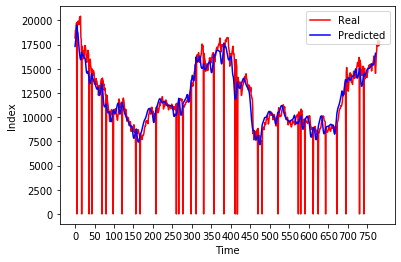

(272, 10, 1)


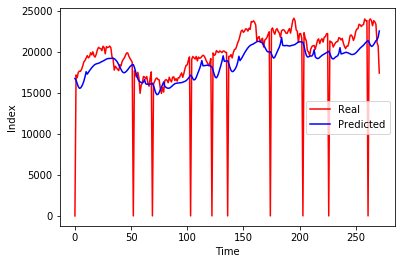

Epoch 1/100
772/772 [==============================] - 35s 45ms/step - loss: 0.0317
Epoch 2/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0137
Epoch 3/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0111
Epoch 4/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0107A: 1s 
Epoch 5/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0113
Epoch 6/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0105
Epoch 7/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0101
Epoch 8/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0105
Epoch 9/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0113
Epoch 10/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0096
Epoch 11/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0107
Epoch 12/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0105A: 0s 

772/772 [==============================] - 2s 2ms/step - loss: 0.0093A: 0s - lo
Epoch 100/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0095


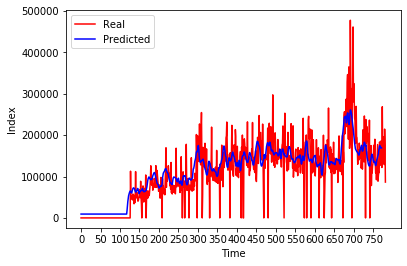

(272, 10, 1)


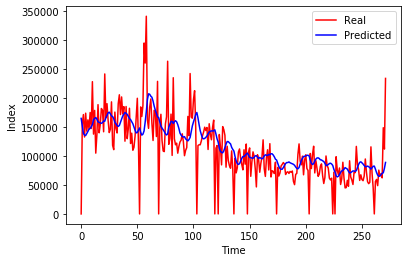

Epoch 1/100
772/772 [==============================] - 41s 53ms/step - loss: 0.1794
Epoch 2/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0411
Epoch 3/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0400
Epoch 4/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0347A: 0s - los
Epoch 5/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0346
Epoch 6/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0346
Epoch 7/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0357
Epoch 8/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0333
Epoch 9/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0339
Epoch 10/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0333
Epoch 11/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0371
Epoch 12/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0345


772/772 [==============================] - 1s 2ms/step - loss: 0.0253
Epoch 100/100
772/772 [==============================] - 1s 1ms/step - loss: 0.0250


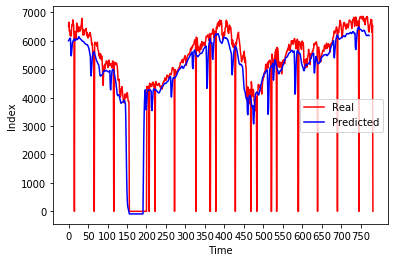

(272, 10, 1)


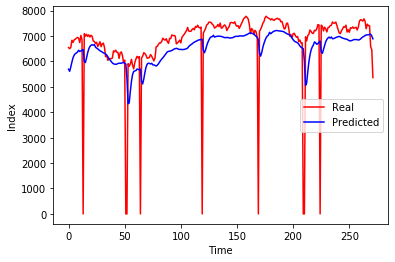

Epoch 1/100
772/772 [==============================] - 39s 50ms/step - loss: 0.0277
Epoch 2/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0144
Epoch 3/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0123
Epoch 4/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0155
Epoch 5/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0124
Epoch 6/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0119
Epoch 7/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0118
Epoch 8/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0130
Epoch 9/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0121
Epoch 10/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0123
Epoch 11/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0123
Epoch 12/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0117
Epoch 13/10

Epoch 99/100
772/772 [==============================] - 1s 2ms/step - loss: 0.0097
Epoch 100/100
772/772 [==============================] - 1s 2ms/step - loss: 0.0102


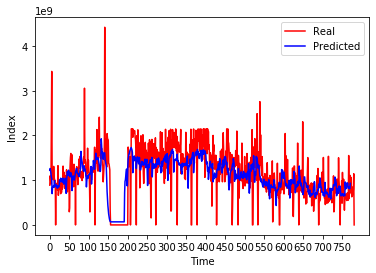

(272, 10, 1)


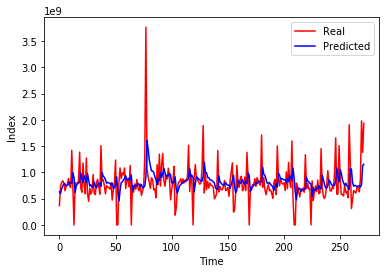

Epoch 1/100
772/772 [==============================] - 43s 56ms/step - loss: 0.1073
Epoch 2/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0360
Epoch 3/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0321
Epoch 4/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0297A: 0s - loss: 0.03
Epoch 5/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0292
Epoch 6/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0303
Epoch 7/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0312
Epoch 8/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0279
Epoch 9/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0306
Epoch 10/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0287
Epoch 11/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0281
Epoch 12/100
772/772 [==============================] - 2s 3ms/step - loss: 

772/772 [==============================] - 1s 2ms/step - loss: 0.0256
Epoch 99/100
772/772 [==============================] - 1s 2ms/step - loss: 0.0237
Epoch 100/100
772/772 [==============================] - 1s 2ms/step - loss: 0.0243


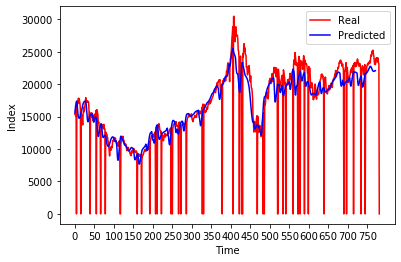

(272, 10, 1)


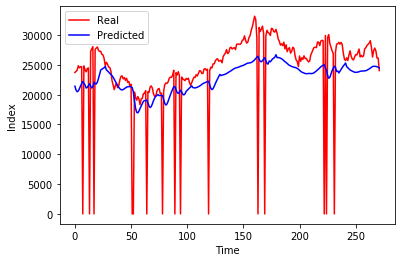

Epoch 1/100
772/772 [==============================] - 42s 54ms/step - loss: 0.0218 11s - loss: 
Epoch 2/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0114
Epoch 3/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0112
Epoch 4/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0111
Epoch 5/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0101
Epoch 6/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0103
Epoch 7/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0104
Epoch 8/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0102
Epoch 9/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0100
Epoch 10/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0099
Epoch 11/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0100
Epoch 12/100
772/772 [==============================] - 2s 3ms/step - loss: 0.010

772/772 [==============================] - 1s 2ms/step - loss: 0.0093
Epoch 99/100
772/772 [==============================] - 1s 2ms/step - loss: 0.0091
Epoch 100/100
772/772 [==============================] - 1s 2ms/step - loss: 0.0092


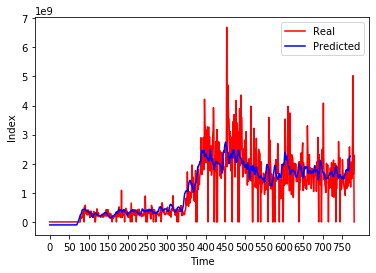

(272, 10, 1)


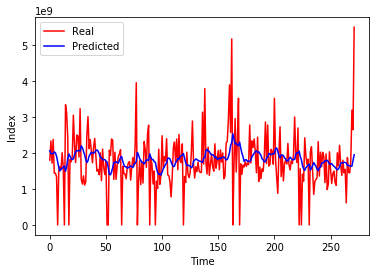

Epoch 1/100
772/772 [==============================] - 42s 54ms/step - loss: 0.1382
Epoch 2/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0274
Epoch 3/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0227
Epoch 4/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0219A: 0s - loss: 0.0
Epoch 5/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0211
Epoch 6/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0187A: 0s - loss: 0.0
Epoch 7/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0182
Epoch 8/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0188
Epoch 9/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0189
Epoch 10/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0186
Epoch 11/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0187
Epoch 12/100
772/772 [==============================] - 2s 3

772/772 [==============================] - 1s 2ms/step - loss: 0.0147
Epoch 99/100
772/772 [==============================] - 1s 2ms/step - loss: 0.0149
Epoch 100/100
772/772 [==============================] - 1s 2ms/step - loss: 0.0155


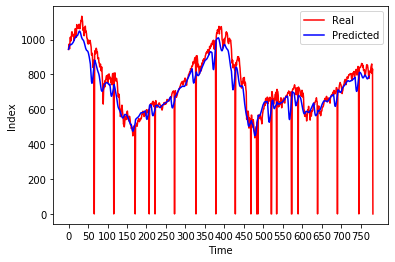

(272, 10, 1)


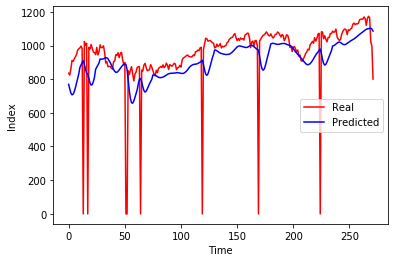

Epoch 1/100
772/772 [==============================] - 44s 57ms/step - loss: 0.0264A
Epoch 2/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0106
Epoch 3/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0108
Epoch 4/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0108
Epoch 5/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0099
Epoch 6/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0100
Epoch 7/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0104A: 1s
Epoch 8/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0101
Epoch 9/100
772/772 [==============================] - 3s 4ms/step - loss: 0.0094
Epoch 10/100
772/772 [==============================] - 3s 4ms/step - loss: 0.0095
Epoch 11/100
772/772 [==============================] - 3s 4ms/step - loss: 0.0095
Epoch 12/100
772/772 [==============================] - 3s 4ms/step - loss: 0.0094
Epoch

772/772 [==============================] - 1s 1ms/step - loss: 0.0082
Epoch 99/100
772/772 [==============================] - 1s 2ms/step - loss: 0.0084
Epoch 100/100
772/772 [==============================] - 1s 2ms/step - loss: 0.0081


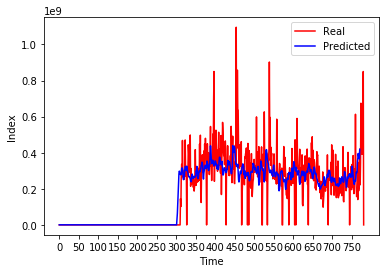

(272, 10, 1)


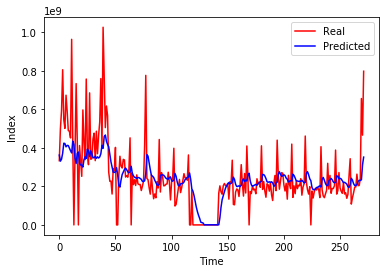

Epoch 1/100
772/772 [==============================] - 44s 58ms/step - loss: 0.0109
Epoch 2/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0107
Epoch 3/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0107
Epoch 4/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0106
Epoch 5/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0106TA: 1s
Epoch 6/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0106
Epoch 7/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0106
Epoch 8/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0105
Epoch 9/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0108
Epoch 10/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0106
Epoch 11/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0106
Epoch 12/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0105
Epoch

772/772 [==============================] - 1s 2ms/step - loss: 0.0105
Epoch 98/100
772/772 [==============================] - 1s 2ms/step - loss: 0.0105
Epoch 99/100
772/772 [==============================] - 1s 2ms/step - loss: 0.0105
Epoch 100/100
772/772 [==============================] - 1s 2ms/step - loss: 0.0106


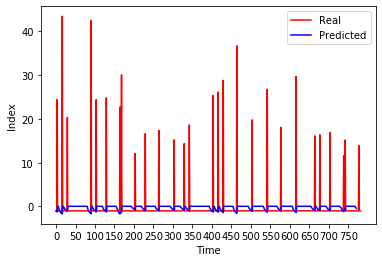

(272, 10, 1)


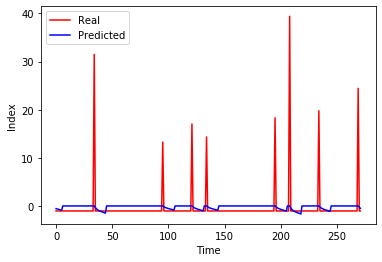

Epoch 1/100
772/772 [==============================] - 71s 92ms/step - loss: 0.0030
Epoch 2/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0029
Epoch 3/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0029A: 0s - loss: 0.
Epoch 4/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0029
Epoch 5/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0029
Epoch 6/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0029
Epoch 7/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0029
Epoch 8/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0029
Epoch 9/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0029
Epoch 10/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0029
Epoch 11/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0029
Epoch 12/100
772/772 [==============================] - 2s 3ms/step - loss: 0.

772/772 [==============================] - 1s 2ms/step - loss: 0.0029
Epoch 100/100
772/772 [==============================] - 1s 2ms/step - loss: 0.0029


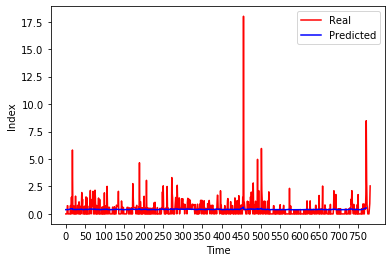

(272, 10, 1)


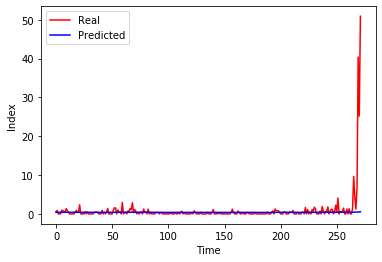

Epoch 1/100
772/772 [==============================] - 47s 61ms/step - loss: 0.0065
Epoch 2/100
772/772 [==============================] - 3s 3ms/step - loss: 0.0065
Epoch 3/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0065
Epoch 4/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0065
Epoch 5/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0064
Epoch 6/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0065
Epoch 7/100
772/772 [==============================] - 3s 3ms/step - loss: 0.0064
Epoch 8/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0065
Epoch 9/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0065
Epoch 10/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0064
Epoch 11/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0068A: 0s - loss
Epoch 12/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0067

772/772 [==============================] - 2s 2ms/step - loss: 0.0064A: 0
Epoch 98/100
772/772 [==============================] - 2s 2ms/step - loss: 0.0064A: 0s - lo
Epoch 99/100
772/772 [==============================] - 1s 2ms/step - loss: 0.0064
Epoch 100/100
772/772 [==============================] - 1s 2ms/step - loss: 0.0064


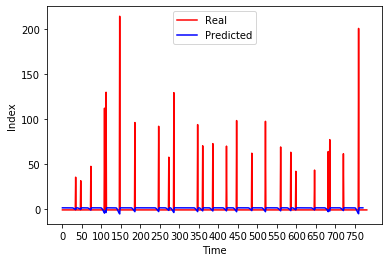

(272, 10, 1)


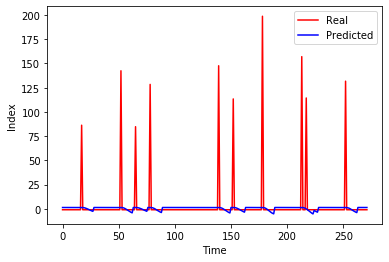

Epoch 1/100
772/772 [==============================] - 49s 63ms/step - loss: 0.0076
Epoch 2/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0075
Epoch 3/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0075
Epoch 4/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0075
Epoch 5/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0075
Epoch 6/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0055
Epoch 25/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0054A: 0s - loss
Epoch 26/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0055
Epoch 27/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0056
Epoch 28/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0055
Epoch 29/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0055
Epoch 30/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0

772/772 [==============================] - 2s 3ms/step - loss: 0.0323
Epoch 27/100
772/772 [==============================] - 3s 3ms/step - loss: 0.0322
Epoch 28/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0324
Epoch 29/100
772/772 [==============================] - 3s 3ms/step - loss: 0.0322
Epoch 30/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0325
Epoch 31/100
772/772 [==============================] - 3s 3ms/step - loss: 0.0323
Epoch 32/100
772/772 [==============================] - 2s 3ms/step - loss: 0.0323
Epoch 33/100
772/772 [==============================] - 3s 4ms/step - loss: 0.0323
Epoch 34/100
772/772 [==============================] - 3s 4ms/step - loss: 0.0322
Epoch 35/100
772/772 [==============================] - 3s 3ms/step - loss: 0.0323
Epoch 36/100
772/772 [==============================] - 3s 3ms/step - loss: 0.0323
Epoch 37/100
772/772 [==============================] - 3s 3ms/step - loss: 0.0322
Epoch 38/100
772/

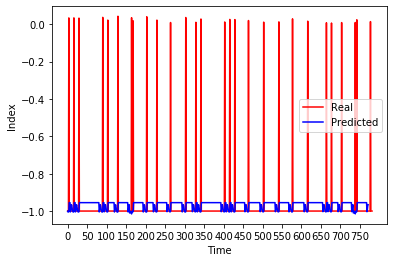

(272, 10, 1)


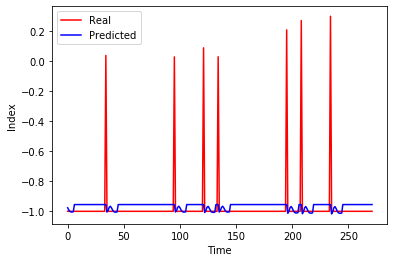

In [8]:
df_train_complete = None
df_test_complete = None
for col in df.columns:
    test_set = df.loc['2015-01-02':, col].fillna(-1).values #Selecting test data
    training_set = df.loc['2000-01-01':'2015-01-01', col].fillna(-1).values #Selecting training data
    training_set = training_set.reshape(-1, 1)
    X_train, y_train, sc = scale(training_set)
    model = train_LSTM(X_train, y_train)
    # Dados de treinamento
    predicted_stock_price_train = model.predict(X_train)
    predicted_stock_price_train = sc.inverse_transform(predicted_stock_price_train)
    plot_results(df.loc['2000-01-01':'2015-01-01', col].fillna(-1), predicted_stock_price_train)
    # Dados de teste
    X_test, predicted_stock_price = predict(df.loc['2000-01-01':'2015-01-01', col].fillna(-1), df.loc['2015-01-02':, col].fillna(-1), model, sc)
    plot_results(df.loc['2015-01-02':, col].fillna(-1), predicted_stock_price)
    
    vazio = np.empty(10)
    predicted_stock_price_train = np.append(vazio, predicted_stock_price_train)
    series_complete_train = impute_with_prediction(df.loc['2000-01-01':'2015-01-01', col], pd.DataFrame(index=df.loc['2000-01-01':'2015-01-01', col].index, data=predicted_stock_price_train))
    df_train_complete = pd.concat([df_train_complete, pd.DataFrame(index=df.loc['2000-01-01':'2015-01-01', col].index, data=series_complete_train, columns=[col])], axis=1, join='outer')
    df_test_complete = pd.concat([df_test_complete, pd.DataFrame(data=predicted_stock_price, index = df.loc['2015-01-02':, col].index, columns = [col])], axis=1, join='outer')

In [9]:
df_train_complete.to_csv(r'output\/CompleteIndexesWeeklyTrainLSTM10.csv', index = True)
df_test_complete.to_csv(r'output\/CompleteIndexesWeeklyTestLSTM10.csv', index = True)